In [1]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd

c:\Users\kanna\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
data_dir = "D:\\PLANT_DISEASE\\archive (7)\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train_final" 

In [3]:
feature_vectors = []
labels = []

In [4]:
# Set parameters for HOG feature extraction
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)

In [6]:
for class_label in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_label)
    
    if not os.path.isdir(class_dir):
        continue

    for image_file in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_file)
        
        image = cv2.imread(image_path)
        
        image = cv2.resize(image, (128, 128))
        
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        features = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                       cells_per_block=cells_per_block, visualize=False, block_norm='L2-Hys')
        
        feature_vectors.append(features)
        labels.append(class_label)

In [7]:
feature_vectors
labels

['Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___

In [8]:
# Convert the feature vectors and labels to NumPy arrays
X = np.array(feature_vectors)

In [9]:
y = np.array(labels)

In [10]:
# Encode class labels (convert class names to integers)
label_encoder = LabelEncoder()
y_enc = label_encoder.fit_transform(y)
y_enc

array([ 0,  0,  0, ..., 14, 14, 14], dtype=int64)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 8098, 32)          128       
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 4049, 32)          0         
 g1D)                                                            
                                                                 
 conv1d_4 (Conv1D)           (None, 4047, 64)          6208      
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 2023, 64)          0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 2021, 128)         24704     
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 1010, 128)        

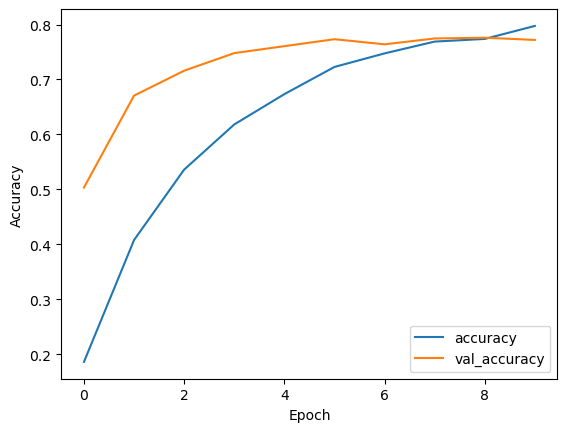

In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, random_state=42)

# Standardize the feature vectors
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data for CNN input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN model
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(64, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(128, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling1D(2))

# Flatten the output and add Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # Optional dropout layer for regularization
model.add(layers.Dense(len(np.unique(y_enc)), activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

epochs = 10  # You can adjust this number based on the training performance

# Train the model
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))


# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

# Plot training history (optional)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
